In [28]:
import os
import collections
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path

import sys
sys.path.append("../src")
#importlib.reload(conversion_mat_to_py)
from conversion_mat_to_py import mat2dict, pretty_dict, matobj2dict, dict2ntuple


In [32]:
def save_data(data):
    
    '''Dados do movimento de sentar e levantar para serem salvos'''
    '''Entrada: DataFrame com dados selecionados para o movimento de sentar e levantar'''
    
    caminho2 = '/Users/User/OneDrive/TCC/ema_motion_analysis_imu/data/'
    arquivo = sample['S1']['description']+'_Sit_to_Stand.csv'
    
    data_sit_to_stand.to_csv(caminho2 + arquivo, sep=';')

In [60]:
# Caminho onde estão os dados
caminho = '/Users/User/OneDrive/TCC/MoVi/IMUmatlab_Subject_1_15/'

# Número do arquivo do sujeito, alterar apenas o número do sueito

''' Alterar o número do sujeito analisado'''
imu_filename = caminho + 'imu_Subject_1.mat'


# Reading MoVi files as a Python dictionary
sample = mat2dict(imu_filename)
pretty_dict(sample, print_type=False, indent=1)

	Key: S1_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: S2_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: I1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: I2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescript

In [61]:

''' Escolher a chave na qual os dados serão utiliados'''
Data = sample['S2_Synched']['data']

dataHeader_filename = caminho + 'dataHeader.mat'
dataHeader = sio.loadmat(dataHeader_filename)
pretty_dict(dataHeader, print_type=False, indent=1)

header = pd.read_csv(caminho + 'columns.csv', sep=';')
header = header[:].values.tolist()

#Transformar os dados em um data frame para facilitar a visualização
data = pd.DataFrame(Data, columns=header)


	Key: __header__
	Key: __version__
	Key: __globals__
	Key: None
	Key: __function_workspace__


# Separando apenas os dados do movimento de sentar e levantar

Verificar os dados de acordo com os vídeos.

### Verificar a necessidade: 

- Converter as amostras em tempo, para fazer a comparação com o tempo dos vídeos. 

In [62]:
# Alterar o início e fim das amostras
data_sit_to_stand = data.iloc[500:1290,:]
data_sit_to_stand.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,21-Q-s,21-Q-x,21-Q-y,21-Q-z,21-A-x,21-A-y,21-A-z,21-W-x,21-W-y,21-W-z
500,0.021125,0.050423,-0.012470,0.001051,0.003724,0.007532,-0.121388,0.709799,0.136588,0.680302,...,1.0,0.0,0.0,0.0,-0.984813,0.002748,0.219240,3.047638e-10,-0.017171,-0.000596
501,0.021204,0.050512,-0.012415,0.000837,0.003683,0.007374,-0.121403,0.709806,0.136602,0.680294,...,1.0,0.0,0.0,0.0,-0.984486,0.000575,0.218403,-8.294836e-11,-0.018818,0.000162
502,0.021223,0.050491,-0.012513,0.002077,0.004584,0.007244,-0.121399,0.709774,0.136605,0.680326,...,1.0,0.0,0.0,0.0,-0.983515,0.004386,0.220079,2.320634e-11,-0.011961,-0.000044
503,0.021313,0.050528,-0.012497,0.003836,0.004523,0.007295,-0.121401,0.709690,0.136573,0.680410,...,1.0,0.0,0.0,0.0,-0.979746,0.003849,0.222048,-9.047347e-12,-0.002591,0.000012
504,0.021290,0.050610,-0.012499,0.000600,0.003618,0.007659,-0.121398,0.709703,0.136489,0.680397,...,1.0,0.0,0.0,0.0,-0.982037,0.003604,0.218284,1.311203e-11,-0.020995,-0.000003


## Testar os dados para o movimento de sentar e levantar 

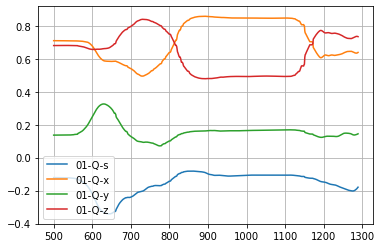

In [63]:
# Alterar o sensor analisado. Foi escolhido o sensor 1 e os dados são os Quaternios
data_Q = data_sit_to_stand.iloc[:,6:10]

# Plotar o gráfico para o movimento sensor e amostras selecionadas
plt.plot(data_Q.index, data_Q.values)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()